# 24장. 고급 분류기

# 24.2

In [1]:
import matplotlib
matplotlib.rc('font', family="NanumBarunGothicOTF")  

%matplotlib inline

In [6]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
model = Sequential([
   Dense(3, input_dim=3, activation='sigmoid'), # 은닉 계층
   Dense(3, activation='sigmoid') # 출력 계층 
])

model.compile(
    loss='categorical_crossentropy',  # 목적 함수
    optimizer='adadelta')  # 최적화 방법

ImportError: cannot import name 'np_utils'

In [7]:
import sklearn.datasets
from keras.models import Sequential
from keras.layers.core import Dense, Activation
import pandas as pd
from sklearn.cross_validation import train_test_split

# 아이리스 데이터셋 준비
ds = sklearn.datasets.load_iris()
X = ds['data']
Y = pd.get_dummies(ds['target']).as_matrix()

# 학습 및 시험 셋으로 나눔 
X_train, X_test, Y_train, Y_test = \
   train_test_split(X, Y, test_size=.2)

# 신경망 구현 : 4차원 입력을 받고 은닉 계층은 노드 50개로 이루어짐
# 최종 출력은 3차원이며 소프트맥스를 활성함수로 이용함 
model = Sequential([
    Dense(50, input_dim=4, activation='sigmoid'),
    Dense(3, activation='softmax')
])

# 문제와 활성함수에 맞는 목적함수 설정
model.compile(
    loss='categorical_crossentropy',
    optimizer='adadelta')
# 학습 수행
model.fit(X_train, Y_train, nb_epoch=5)
# 학습 결과 평가
proba = model.predict_proba(X_test, batch_size=32)
pred = pd.Series(proba.flatten())
true = pd.Series(Y_test.flatten())
print("상관계수:", pred.corr(true))

ImportError: cannot import name 'np_utils'

# 24.5 합성곱신경망

In [8]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
import pandas as pd
import sklearn.datasets
from sklearn.cross_validation import train_test_split
from sklearn import datasets

# MNIST 데이터를 다운받는다.
data_dict = datasets.fetch_mldata('MNIST Original')
X = data_dict['data']
Y = data_dict['target']
# 데이터를 학습셋과 시험셋으로 나눈다 .
X_train, X_test, Y_train, Y_test = \
    train_test_split(X, Y, test_size=.1)

# 데이터를 4차원으로 변환한다.
X_train = X_train.reshape((63000, 28, 28, 1))
X_test = X_test.reshape((7000, 28, 28, 1))
Y_train = pd.get_dummies(Y_train).as_matrix()

nb_samples = X_train.shape[0]
nb_classes = Y_train.shape[1]

# 학습 변수
BATCH_SIZE = 16

# 모델 하이퍼매개변수
KERNEL_WIDTH = 5
KERNEL_HEIGHT = 5
STRIDE = 1
N_FILTERS = 10

# 모델을 만든다. 
model = Sequential()
model.add(Convolution2D(
    nb_filter=N_FILTERS,
    input_shape=(28, 28, 1),
    nb_row=KERNEL_HEIGHT,
    nb_col=KERNEL_WIDTH,
    subsample=(STRIDE, STRIDE))
)
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(5, 5)))
model.add(Flatten())
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

# 학습
model.compile(loss='categorical_crossentropy',
              optimizer='adadelta')
print('학습을 시작합니다..')
model.fit(X_train, Y_train, nb_epoch=10)

# 학습된 모델을 평가한다.
probs = model.predict_proba(X_test)
preds = model.predict(X_test)
pred_classes = model.predict_classes(X_test)
true_classes = Y_test
(pred_classes == true_classes).sum()


SyntaxError: Missing parentheses in call to 'print' (<ipython-input-8-6edfb5d53511>, line 51)

# 24.6 순환신경망

In [ ]:
import sklearn.datasets
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers.recurrent import LSTM
import statsmodels as sm

# 데이터셋을 불러온다. 
df = sm.datasets.elnino.load_pandas().data
X = df.as_matrix()[:, 1:-1]
X = (X - X.min()) / (X.max() - X.min())
Y = df.as_matrix()[:, -1].reshape(61)
# 간단한 전처리
Y = (Y - Y.min()) / (Y.max() - Y.min())
# 학습셋과 시험셋으로 나눈다
X_train, X_test, Y_train, Y_test = (
    train_test_split(X, Y, test_size=0.1)

# 모델을 만든다. 
model = Sequential()
# LSTM의 메모리는 20차원 벡터
model.add(LSTM(20, input_shape=(11, 1)))
# 예측값은 1차원 (스칼라) 값이다
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error',
              optimizer='adadelta')
# 학습 수행 
model.fit(X_train.reshape((54, 11, 1)),
          Y_train, nb_epoch=5)
# 학습한 모델을 평가한다.
proba = model.predict_proba(X_test.reshape((7, 11, 1)),
                            batch_size=32)
pred = pd.Series(proba.flatten())
true = pd.Series(Y_test.flatten())
print("예측값과 실젯값의 상관계수:", pred.corr(true))


# 24.10 PyMC 예제

 [-----------------100%-----------------] 40000 of 40000 complete in 6.0 secPlotting C
Plotting B
Plotting A


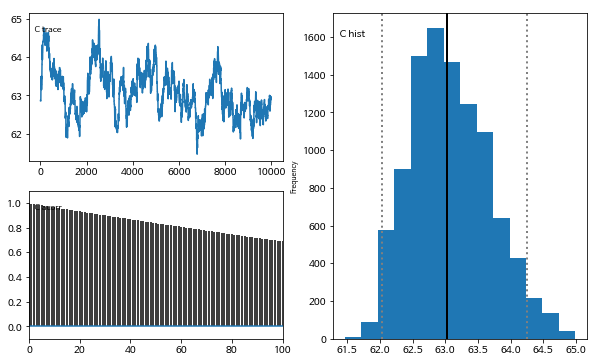

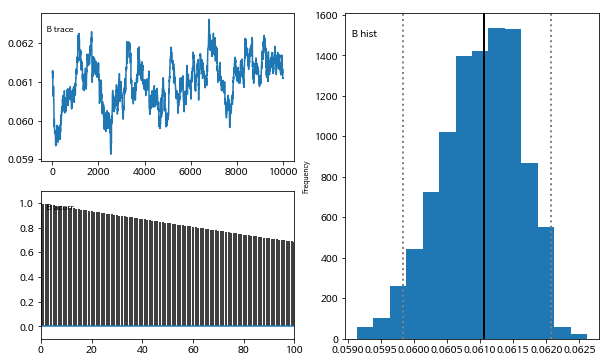

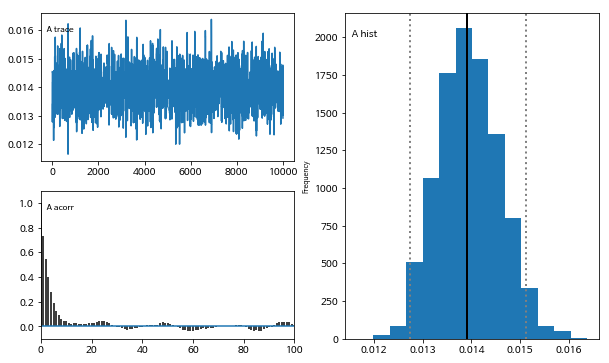

In [5]:
import pymc
import pymc_model as mymodel  # 모델을 불러온다
import matplotlib.pyplot as plt
S = pymc.MCMC(mymodel)  # 모델 생성
S.sample(iter = 40000, burn = 30000)  # 초반 30000개는 무시한다
pymc.Matplot.plot(S)  # 추정 값을 시각화한다
plt.show()